In [216]:
def flatten(in_dict):
    out_dict = {}
    for k, v in in_dict.items():
        if isinstance(v, dict):
            v_flat = flatten(v)
            out_dict.update({k+"."+v_k: v_v for v_k, v_v in v_flat.items()})
        else:
            out_dict[k] = v
    return out_dict

In [217]:
def unique_cols(df, blacklist=set([
     'heartbeat',
     'log_dir',
     'run_id',
     'host.cpu',
     'host.gpus.driver_version',
     'host.hostname',
     'host.python_version',
     'start_time',
     'status',
     'stop_time',
     'the_dir',
     'result.acc_last',
     'result.acc_mean',
     'result.acc_std',
     'result.acc_stderr',
     'result.lp_ensemble',
     'result.lp_ensemble_std',
     'result.lp_ensemble_stderr',
     'result.lp_last',
     'result.lp_mean',
     'result.lp_std',
     'result.lp_stderr'])):

    different_cols = []
    for col in df:
        if col in blacklist or col.startswith("meta.options") or col.startswith("result."):
            continue
        try:
            if len(df[col].unique()) > 1:
                different_cols.append(col)

        except TypeError:
            pass
    return different_cols

In [218]:
base_log_dir = Path("/scratches/huygens/ag919/BNN-priors/logs/0_51_integrators_cifar")

series_list = []

for run in os.listdir(base_log_dir):
    if run in ["_sources", "jugdir"]:
        continue
    try:
        with open(base_log_dir/run/"run.json") as f:
            s2 = pd.Series(flatten(json.load(f)))
        with open(base_log_dir/run/"config.json") as f:
            s1 = pd.Series(flatten(json.load(f)))
    except FileNotFoundError:
        continue
    except json.JSONDecodeError:
        continue
        
    s2["the_dir"] = base_log_dir/run
    series_list.append(pd.concat([s1, s2]))
        
    
df = pd.DataFrame(series_list)
full_df = df[df["status"] != "FAILED"]
full_df[["lr", "temperature", "weight_prior", "inference", "status"]]

/scratches/huygens/ag919/venv/py37/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  # Remove the CWD from sys.path while we load stuff.


,lr,temperature,weight_prior,inference,status
2,0.100000,1.00,gaussian,VerletSGLDReject,COMPLETED
3,0.000100,0.01,gaussian,SGLD,COMPLETED
4,0.000100,0.00,NaN,NaN,NaN
5,0.000001,1.00,gaussian,HMCReject,COMPLETED
6,0.001000,1.00,gaussian,VerletSGLDReject,COMPLETED
...,...,...,...,...,...
95,0.001000,1.00,gaussian,HMCReject,COMPLETED
96,0.100000,1.00,gaussian,HMCReject,COMPLETED
97,0.000001,1.00,gaussian,SGLD,RUNNING
99,0.001000,1.00,gaussian,VerletSGLDReject,COMPLETED


In [219]:
other_df = pd.read_pickle("0_5_lr_cifar10.pkl.gz")

In [220]:
long_cycles = full_df
long_cycles[["inference", "status", "lr", "cycles", "data", "temperature"]]

,inference,status,lr,cycles,data,temperature
2,VerletSGLDReject,COMPLETED,0.100000,300.0,cifar10_augmented,1.00
3,SGLD,COMPLETED,0.000100,300.0,cifar10_augmented,0.01
4,NaN,NaN,0.000100,NaN,cifar10_augmented,0.00
5,HMCReject,COMPLETED,0.000001,300.0,cifar10_augmented,1.00
6,VerletSGLDReject,COMPLETED,0.001000,60.0,cifar10_augmented,1.00
...,...,...,...,...,...,...
95,HMCReject,COMPLETED,0.001000,60.0,cifar10_augmented,1.00
96,HMCReject,COMPLETED,0.100000,300.0,cifar10_augmented,1.00
97,SGLD,RUNNING,0.000001,300.0,cifar10_augmented,1.00
99,VerletSGLDReject,COMPLETED,0.001000,300.0,cifar10_augmented,1.00


In [221]:
combined_df = pd.concat([long_cycles, other_df])
combined_df = combined_df[combined_df["inference"] == "HMCReject"]

different_cols = []
for col in combined_df:
    try:
        if len(combined_df[col].unique()) > 1:
            different_cols.append(col)
            
    except TypeError:
        print(col, "had type error")

artifacts had type error
experiment.dependencies had type error
experiment.repositories had type error
experiment.sources had type error
host.gpus.gpus had type error
host.os had type error
meta.options.UPDATE had type error
resources had type error


In [222]:
full_df.dropna(subset=["inference"])

,batch_size,batchnorm,bias_loc,bias_prior,bias_scale,burnin,cycles,data,depth,device,...,result.acc_stderr,result.lp_ensemble,result.lp_ensemble_std,result.lp_ensemble_stderr,result.lp_last,result.lp_mean,result.lp_std,result.lp_stderr,n_epochs,weight_decay
2,125.0,True,0.0,gaussian,1.0,0.0,300.0,cifar10_augmented,20.0,try_cuda,...,0.000877,-0.255021,2.597183,0.149948,-0.236781,-0.255357,0.026449,0.001527,NaN,NaN
3,125.0,True,0.0,gaussian,1.0,0.0,300.0,cifar10_augmented,20.0,try_cuda,...,0.000295,-0.108873,2.743064,0.158371,-0.098729,-0.108920,0.009718,0.000561,NaN,NaN
5,125.0,True,0.0,gaussian,1.0,0.0,300.0,cifar10_augmented,20.0,try_cuda,...,0.000578,-0.228105,2.623874,0.151489,-0.241954,-0.228191,0.013080,0.000755,NaN,NaN
6,125.0,True,0.0,gaussian,1.0,0.0,60.0,cifar10_augmented,20.0,try_cuda,...,0.002040,-0.234924,1.812607,0.234007,-0.217105,-0.235302,0.028095,0.003627,NaN,NaN
11,125.0,True,0.0,gaussian,1.0,0.0,300.0,cifar10_augmented,20.0,try_cuda,...,0.001111,-0.110902,2.741441,0.158277,-0.093275,-0.111440,0.034394,0.001986,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,125.0,True,0.0,gaussian,1.0,0.0,60.0,cifar10_augmented,20.0,try_cuda,...,0.003902,-0.281077,1.767406,0.228171,-0.256236,-0.282599,0.057800,0.007462,NaN,NaN
96,125.0,True,0.0,gaussian,1.0,0.0,300.0,cifar10_augmented,20.0,try_cuda,...,0.003034,-0.872219,1.986527,0.114692,-0.825508,-0.881869,0.152569,0.008809,NaN,NaN
97,125.0,True,0.0,gaussian,1.0,0.0,300.0,cifar10_augmented,20.0,try_cuda,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99,125.0,True,0.0,gaussian,1.0,0.0,300.0,cifar10_augmented,20.0,try_cuda,...,0.001416,-0.235640,2.617077,0.151097,-0.219538,-0.236656,0.047733,0.002756,NaN,NaN


## Create model class

First we create the model class used in the run. Used in the metrics to know the sizes of the parameters.

In [113]:
with open(Path(full_df.dropna(subset=["inference"]).iloc[0, :]["the_dir"])/"config.json", "r") as f:
    config = json.load(f)

device = torch.device("cpu")  # can be CUDA instead
data = exp_utils.get_data(config["data"], device)
model = exp_utils.get_model(x_train=data.norm.train_X, y_train=data.norm.train_y,
                            **{k: v for k, v in config.items() if k in set((
                               "model",
                               "width", "depth", "weight_prior", "weight_loc", "weight_scale",
                               "bias_prior", "bias_loc", "bias_scale", "batchnorm",
                               "weight_prior_params", "bias_prior_params"))})

print(f"Loaded model of kind {config['model']}")
config["temperature"]

Loaded model of kind googleresnet


0.01

In [12]:
config["temperature"], config["lr"]

(1.0, 0.1)

In [13]:
sizes = plot.get_sizes(model)


## Plot metrics

First we load the metrics, then we plot various aspects of them.

In [195]:
old_completed_df

,lr,momentum,model,data,width,temperature,weight_decay,sampling_decay,n_epochs,status,...,result.acc_stderr,result.lp_ensemble,result.lp_ensemble_std,result.lp_ensemble_stderr,result.lp_last,result.lp_mean,result.lp_std,result.lp_stderr,start_time,stop_time
1,0.01,0.993632,googleresnet,cifar10_augmented,16,0.01,NaN,cosine,NaN,COMPLETED,...,0.000600,-0.101700,1.945502,0.251163,-0.098599,-0.101732,0.008043,0.001038,2020-11-26T23:07:01.340899,2020-11-27T11:14:49.454719
2,0.01,0.993632,googleresnet,cifar10_augmented,16,0.10,NaN,cosine,NaN,COMPLETED,...,0.000635,-0.111480,1.935738,0.249903,-0.105785,-0.111527,0.009798,0.001265,2020-11-26T23:10:19.471311,2020-11-27T11:14:32.920350
3,0.01,0.993632,googleresnet,cifar10_augmented,16,1.00,NaN,cosine,NaN,COMPLETED,...,0.001452,-0.177464,1.869911,0.241405,-0.154240,-0.177672,0.020760,0.002680,2020-11-26T23:07:15.256114,2020-11-28T12:05:32.032646


In [212]:
df = pd.concat([old_completed_df, full_df[(full_df["model"] == "googleresnet")
                                 & (full_df["lr"] == 0.001)
                                 & (full_df["inference"] == 'HMCReject')]])

df[unique_cols(df)]

,lr,momentum,temperature,sampling_decay,batch_size,burnin,cycles,inference,load_samples,n_samples,seed,warmup
1,0.010,0.993632,0.01,cosine,128.0,20.0,60.0,VerletSGLDReject,NaN,60.0,730404524.0,29.0
2,0.010,0.993632,0.10,cosine,128.0,20.0,60.0,VerletSGLDReject,NaN,60.0,18448940.0,29.0
3,0.010,0.993632,1.00,cosine,128.0,20.0,60.0,VerletSGLDReject,NaN,60.0,402759276.0,29.0
48,0.001,1.000000,1.00,flat,125.0,0.0,300.0,HMCReject,None,300.0,356098447.0,9.0
69,0.001,1.000000,1.00,flat,125.0,0.0,300.0,HMCReject,/scratches/huygens/ag919/BNN-priors/logs/0_51_...,300.0,423886212.0,9.0
95,0.001,1.000000,1.00,flat,125.0,0.0,60.0,HMCReject,None,60.0,428226854.0,49.0


In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(14, 12), facecolor='white')


inference = "HMCReject"
temperature = 1.0
model = "googleresnet"

def accept_prob(x):
    return np.exp(np.minimum(0., -x/temperature))
def log_accept_prob(x):
    return -x/temperature


completed_df = pd.concat([df[(df["weight_prior"] == "gaussian") 
                           & (df["inference"] == inference) 
                           & (df["model"] == model)
                           & (df["temperature"] == temperature)]])
                          #old_completed_df])
completed_df.index = range(len(completed_df))

cmap = plt.get_cmap('plasma')

fig.suptitle(f"temperature={temperature}, inference={inference}")
for i_order, idx in enumerate(completed_df.sort_values("lr").index):
    color_kwargs = dict(color=cmap((i_order+1) / len(completed_df)), alpha=0.8)
    plot_kwargs = dict(label=f"lr={completed_df.loc[idx, 'lr']}, alg={completed_df.loc[idx, 'inference'][:3]}", **color_kwargs)
    print(Path(completed_df.loc[idx, "the_dir"], "metrics.h5"))
    with h5py.File(Path(completed_df.loc[idx, "the_dir"], "metrics.h5"), "r", swmr=True) as metrics:
        is_sample_mask = (metrics['acceptance/is_sample'][:] == 1)
        full_mask = slice(None)
        ax = axes[0, 0]
        plot.metric(ax, metrics, "delta_energy", transform=(lambda x: log_accept_prob(x) + metrics["potential"][full_mask]*50000),
                    plot_kwargs=plot_kwargs, mask=full_mask)
        ax.set_title("log accept prob")
        #plot.vlines(ax, metrics, is_sample_mask)

        ax = axes[0, 1]
        plot.metric(ax, metrics, "delta_energy", mask=full_mask, ewma_alpha=0.0, iqr_ylim=None,
                   plot_kwargs=plot_kwargs, legend=False)
        ax.set_title("delta_energy")

        #plot.vlines(axes[1], metrics, is_sample_mask)
        ax = axes[0, 2]
        plot.metric(ax, metrics, "total_energy", mask=full_mask, iqr_ylim=None, plot_kwargs=plot_kwargs, legend=False)
        ax.set_title("total_energy")
        
        ax = axes[1, 0]
        plot.temperature_stderr(ax, metrics, "est_temperature", sizes, mask=full_mask, legend=False,
                                line_kwargs=color_kwargs)
        ax.set_title("est_temperature/all")
        
        ax = axes[1, 1]
        plot.temperature_stderr(ax, metrics, "est_config_temp", sizes, mask=full_mask, legend=False,
                                line_kwargs=color_kwargs)
        ax.set_title("est_config_temp/all")
        
        
        ax = axes[1, 2]
        plot.metric(ax, metrics, "potential", mask=full_mask, plot_kwargs=plot_kwargs, legend=False, transform=lambda x: x*50000)
        ax.set_title("potential")
        #plot.vlines(ax, metrics, is_sample_mask)
        
        ax = axes[2, 0]
        plot.metric(ax, metrics, "test/acc", mask=is_sample_mask, plot_kwargs=color_kwargs, legend=False)
        ax.set_title("test/acc")
        
        ax = axes[2, 1]
        plot.metric(ax, metrics, "test/loss", mask=is_sample_mask, plot_kwargs=plot_kwargs, legend=False)
        ax.set_title("test/loss")
        
        ax = axes[2, 2]
        plot.metric(ax, metrics, "log_prior", mask=full_mask, plot_kwargs=plot_kwargs, legend=False)
        ax.set_title("log_prior")
#axes[0, 0] .set_ylim((-10000, 10000))
#axes[0,1] .set_ylim((-100000, 0))
#axes[1, 2] .set_ylim((-20000, 0))

        
#for ax in axes.flat:
#    ax.set_xlim((104000, 104100))

/scratches/huygens/ag919/BNN-priors/logs/0_51_integrators_cifar/10/metrics.h5
/scratches/huygens/ag919/BNN-priors/logs/0_51_integrators_cifar/90/metrics.h5
/scratches/huygens/ag919/BNN-priors/logs/0_51_integrators_cifar/120/metrics.h5


In [122]:
np.where(~np.isnan(metrics["test/acc"]))

(array([    40,     80,    120, ..., 119926, 119966, 120006]),)

[   nan    nan    nan ...    nan    nan 0.8358]
[   nan    nan    nan ...    nan    nan 0.8193]
[   nan    nan    nan ...    nan    nan 0.8139]
[   nan    nan    nan ...    nan    nan 0.8417]
[   nan    nan    nan ...    nan    nan 0.8455]


OSError: Unable to open file (unable to open file: name = '/scratches/huygens/ag919/BNN-priors/logs/0_51_integrators_cifar/125/metrics.h5', errno = 2, error message = 'No such file or directory', flags = 40, o_flags = 0)

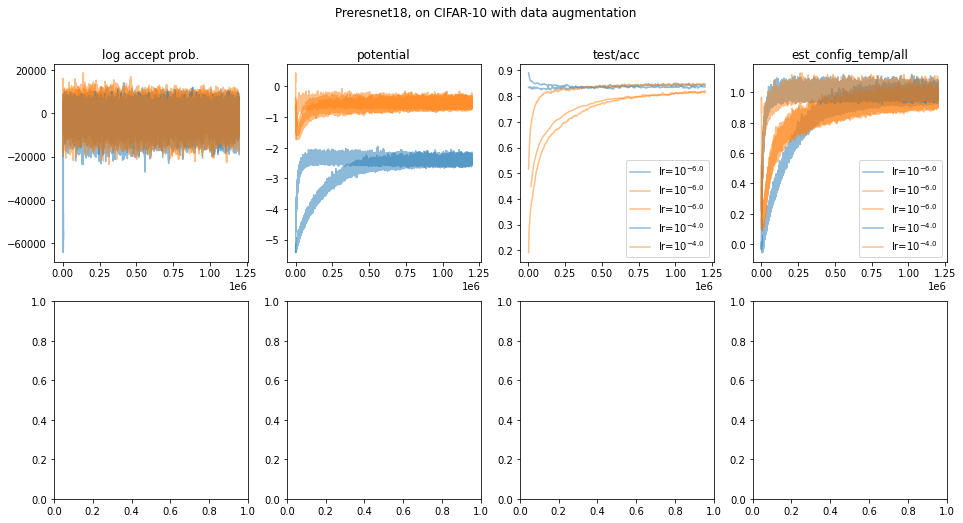

In [223]:
fig, all_axes = plt.subplots(2, 4, figsize=(16, 8), facecolor='white')


def log_accept_prob(x):
    return -x/temperature

inference = "VerletSGLDReject"
temperature = 1.0
fig.suptitle(f"Preresnet18, on CIFAR-10 with data augmentation")


completed_df = df[(df["weight_prior"] == "gaussian") 
                       & (df["temperature"] == temperature)
                       & (df["inference"] == inference)
                       & (df["lr"] != 0.1)]

min_log_lr = math.log(full_df["lr"].min(), 10) - 1
max_log_lr = math.log(full_df["lr"].max(), 10)
_cmap = plt.get_cmap('plasma')

def lr_cmap(log_lr):
    x = (log_lr - min_log_lr) / (max_log_lr- min_log_lr)
    return _cmap(x)
    
main_mask =slice(0, None, )

axes = all_axes[0]
for i_order, idx in enumerate(completed_df.sort_values("lr").index):
    log_lr = round(math.log(completed_df.loc[idx, 'lr'], 10)*10) / 10
    
    #color_kwargs = dict(color=lr_cmap(log_lr), alpha=1)
    #color_kwargs = dict(color="C1", alpha=1)
    color_kwargs = dict(color=("C1" if completed_df.loc[idx, "load_samples"] is None else "C0"), alpha=0.5)
    plot_kwargs = dict(label=f"lr=$10^{{{log_lr}}}$", **color_kwargs)
    
    with h5py.File(Path(completed_df.loc[idx, "the_dir"], "metrics.h5"), "r", swmr=True) as metrics:
        is_sample_mask = (metrics['acceptance/is_sample'][:] == 1)
        #is_sample_mask = slice(None)
        ax = axes[0]
        plot.metric(ax, metrics, "delta_energy", transform=log_accept_prob,
                    plot_kwargs=plot_kwargs, mask=main_mask, legend=False)
        ax.set_title("log accept prob.")
        
        ax = axes[1]
        plot.metric(ax, metrics, "potential", mask=main_mask, plot_kwargs=plot_kwargs, legend=False)
        ax.set_title("potential")
        
        ax = axes[2]
        plot.metric(ax, metrics, "test/acc", mask=is_sample_mask, plot_kwargs=plot_kwargs)
        ax.set_title("test/acc")
        print(metrics["test/acc"][:])
        
        ax = axes[3]
        plot.metric(ax, metrics, "est_config_temp/all", mask=main_mask, plot_kwargs=plot_kwargs)
        ax.set_title("est_config_temp/all")
axes[0].set_ylabel("Gradient-guided MC")

        
inference = "HMCReject"
temperature = 1.0
cmap = plt.get_cmap('plasma')

completed_df = long_cycles[(long_cycles["weight_prior"] == "gaussian") 
                       & (long_cycles["temperature"] == temperature)
                       & (long_cycles["inference"] == inference)
                       & (long_cycles["lr"] != 0.1)]

axes = all_axes[1]
for i_order, idx in enumerate(completed_df.sort_values("lr").index):
    log_lr = round(math.log(completed_df.loc[idx, 'lr'], 10)*10) / 10
    
    #color_kwargs = dict(color=lr_cmap(log_lr), alpha=1)
    color_kwargs = dict(color=("C1" if completed_df.loc[idx, "load_samples"] is None else "C0"), alpha=1)
    plot_kwargs = dict(label=f"lr=$10^{{{completed_df.loc[idx, 'lr']}}}$", **color_kwargs)
    
    with h5py.File(Path(completed_df.loc[idx, "the_dir"], "metrics.h5"), "r", swmr=True) as metrics:
        is_sample_mask = (metrics['acceptance/is_sample'][:] == 1)
        #is_sample_mask = slice(None)
        ax = axes[0]
        plot.metric(ax, metrics, "delta_energy", transform=log_accept_prob,
                    plot_kwargs=plot_kwargs, mask=main_mask, legend=False)
        ax.set_title("log accept prob.")
        
        ax = axes[1]
        plot.metric(ax, metrics, "potential", mask=main_mask, plot_kwargs=plot_kwargs, legend=False)
        ax.set_title("potential")
        
        ax = axes[2]
        plot.metric(ax, metrics, "est_temperature/all", mask=main_mask, plot_kwargs=plot_kwargs)
        ax.set_title("est_temperature/all")
        
        ax = axes[3]
        plot.metric(ax, metrics, "est_config_temp/all", mask=main_mask, plot_kwargs=plot_kwargs)
        ax.set_title("est_config_temp/all")
axes[0].set_ylabel("Hamiltonian MC")
        
for axes in all_axes:
    axes[0].set_ylim((-200000, 20000))
    axes[0].set_xlim((0, 10000))
    axes[1].set_xlim((0, 10000))
    axes[2].set_xlim((0, 10000))

In [101]:
inference = "VerletSGLDReject"
temperature = 1.0

completed_df = full_df[(full_df["weight_prior"] == "gaussian") 
                       & (full_df["temperature"] == temperature)
                       & (full_df["inference"] == inference)
                       & (full_df["lr"] != 0.1)]


full_df[[*unique_cols(full_df), "sampling_decay", "result.acc_mean", "result.lp_ensemble"]].sort_values("result.acc_mean")

,model,temperature,weight_decay,sampling_decay,n_epochs,batch_size,batchnorm,bias_loc,bias_prior,bias_scale,...,weight_prior,weight_scale,command,experiment.base_dir,experiment.mainfile,experiment.name,meta.command,sampling_decay,result.acc_mean,result.lp_ensemble
4,resnet18,1.00,NaN,cosine,NaN,128.0,True,0.0,gaussian,1.0,...,gaussian,1.414214,main,/scratches/huygens/ag919/BNN-priors/experiments,train_bnn.py,bnn_training,main,cosine,0.853503,-0.205563
3,googleresnet,1.00,NaN,cosine,NaN,128.0,True,0.0,gaussian,1.0,...,gaussian,1.414214,main,/scratches/huygens/ag919/BNN-priors/experiments,train_bnn.py,bnn_training,main,cosine,0.868652,-0.177464
2,googleresnet,0.10,NaN,cosine,NaN,128.0,True,0.0,gaussian,1.0,...,gaussian,1.414214,main,/scratches/huygens/ag919/BNN-priors/experiments,train_bnn.py,bnn_training,main,cosine,0.901575,-0.111480
8,resnet18,0.10,NaN,cosine,NaN,128.0,True,0.0,gaussian,1.0,...,gaussian,1.414214,main,/scratches/huygens/ag919/BNN-priors/experiments,train_bnn.py,bnn_training,main,cosine,0.903990,-0.109656
1,googleresnet,0.01,NaN,cosine,NaN,128.0,True,0.0,gaussian,1.0,...,gaussian,1.414214,main,/scratches/huygens/ag919/BNN-priors/experiments,train_bnn.py,bnn_training,main,cosine,0.907828,-0.101700
6,resnet18,0.01,NaN,cosine,NaN,128.0,True,0.0,gaussian,1.0,...,gaussian,1.414214,main,/scratches/huygens/ag919/BNN-priors/experiments,train_bnn.py,bnn_training,main,cosine,0.922052,-0.087647
0,googleresnet,0.00,0.0,flat,3000.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,flat,NaN,NaN
5,resnet18,0.00,0.0,flat,3000.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,flat,NaN,NaN
7,googleresnet,0.00,0.0,cosine,3000.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,cosine,NaN,NaN
